In [1]:
#2021.06.23. WED
#Hankyeong

##CH09. PCA(Principal Component Analysis)
#00. 패키지 호출
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#00-1. 시각화 옵션 설정하기. 
%matplotlib inline 

#01. iris 데이터셋에서 Numpy를 이용해 공분산 행렬과 고유값, 고유벡터 구하기. 
#(1) 데이터셋 불러오기. 
iris = load_iris() 

#(2) 정규화 시행하기. 
scaler = StandardScaler()
iris_scaling = scaler.fit_transform(iris.data)

#(3) Numpy를 이용해 공분산 행렬 구하기.
iris_cov = np.dot(iris_scaling.T, iris_scaling) / (len(iris_scaling)-1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [2]:
np.cov(iris_scaling.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [3]:
#(4) 고유값, 고유벡터 구하기.  
eig_vals = np.linalg.eig(iris_cov)[0]
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [4]:
#(5) 고유벡터 구하기. 
eig_vecs = np.linalg.eig(iris_cov)[1]
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [5]:
#(6) 주성분1(PC1) 구하기. 
PC1 = np.dot(iris_scaling, eig_vecs[:,0:1])
PC1[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [6]:
#(7) 주성분2(PC2) 구하기. 
PC2 = np.dot(iris_scaling, eig_vecs[:,1:2])
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [7]:
#(8) 추출한 주성분 벡터들로 데이터프레임 구성하기. 
df_iris_pca = pd.DataFrame({
    'PC1' : PC1.reshape(-1,),
    'PC2' : PC2.reshape(-1,),
    'species' : iris.target
})
df_iris_pca

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


In [8]:
#02. sklearn을 이용해 공분산 행렬과 고유값, 고유벡터 구하기. 
#(1) PCA 객체 지정하기. 
pca = PCA(n_components=2)

#(2) fit_transform() 메서드를 이용해 PCA 추출하기. 
iris_pca_2 = pca.fit_transform(iris_scaling)
iris_pca_2[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [9]:
#(3) PCA가 담당하는 변동비율 확인하기. 
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

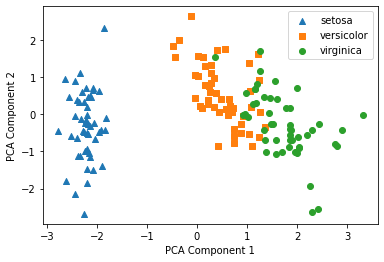

In [10]:
#03. PCA 시각화하기. 
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_iris_pca[df_iris_pca.species == i]['PC1']
    y_axis_data = df_iris_pca[df_iris_pca.species == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [11]:
#04-1. PCA 처리 전 Decision Tree 분류하기. 
#(1) train, test 데이터셋으로 분류하기. 
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2021
)
#(2) Decision Tree 모델 설정하기. 
dt = DecisionTreeClassifier()

#(3) Decision Tree 모델 학습하기. 
dt.fit(X_train,y_train)

#(4) Decision Tree 모델 예측 및 평가하기. 
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.8947368421052632

In [13]:
#04-2. PCA 처리 후 Decision Tree 분류하기. 
#(1) train, test 데이터셋으로 분류하기. 
X_train, X_test, y_train, y_test = train_test_split(
    df_iris_pca.iloc[:,:-1], iris.target, stratify=iris.target, random_state=2021
)
#(2) Decision Tree 모델 설정하기. 
dt = DecisionTreeClassifier()

#(3) Decision Tree 모델 학습하기. 
dt.fit(X_train,y_train)

#(4) Decision Tree 모델 예측 및 평가하기. 
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.9210526315789473

In [14]:
#MEMO. 모든 데이터셋에 대해 그런 것은 아님!

In [15]:
#PLUS. wine 데이터셋 PCA 처리하기. 
#(1) 데이터셋 불러오기
wine = load_wine() 

#(2) 정규화 시행하기. 
scaler = StandardScaler()
wine_scaling = scaler.fit_transform(wine.data)

#(3) PCA 객체 지정하기. 
pca = PCA(n_components=2)

#(2) fit_transform() 메서드를 이용해 PCA 추출하기. 
wine_pca = pca.fit_transform(wine_scaling)
wine_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [16]:
#(3) PCA가 담당하는 변동비율 확인하기. 
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [17]:
#(4) PCA 처리 후 데이터프레임으로 변환하기. 
df_wine_pca = pd.DataFrame(wine_pca, columns=['PC1','PC2'])
df_wine_pca['target'] = wine.target
df_wine_pca

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2
